Explore the differences between **discretization** and **normalization**. We will use the Wine Quality Dataset for this purpose.

In [34]:
import pandas as pd

df = pd.read_csv('WineQT.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [35]:
import matplotlib.pyplot as plt

# Just a helper function to render the distributions of all the variables
# (to prevent writting the same code over and over)
def showDistributions(dataFrame, title):
    dataFrame.hist(figsize=(16, 12), bins=20) 
    plt.suptitle(title, y=1.02)  
    plt.tight_layout()
    plt.show()

Now we take a look at the distribution of the different variables

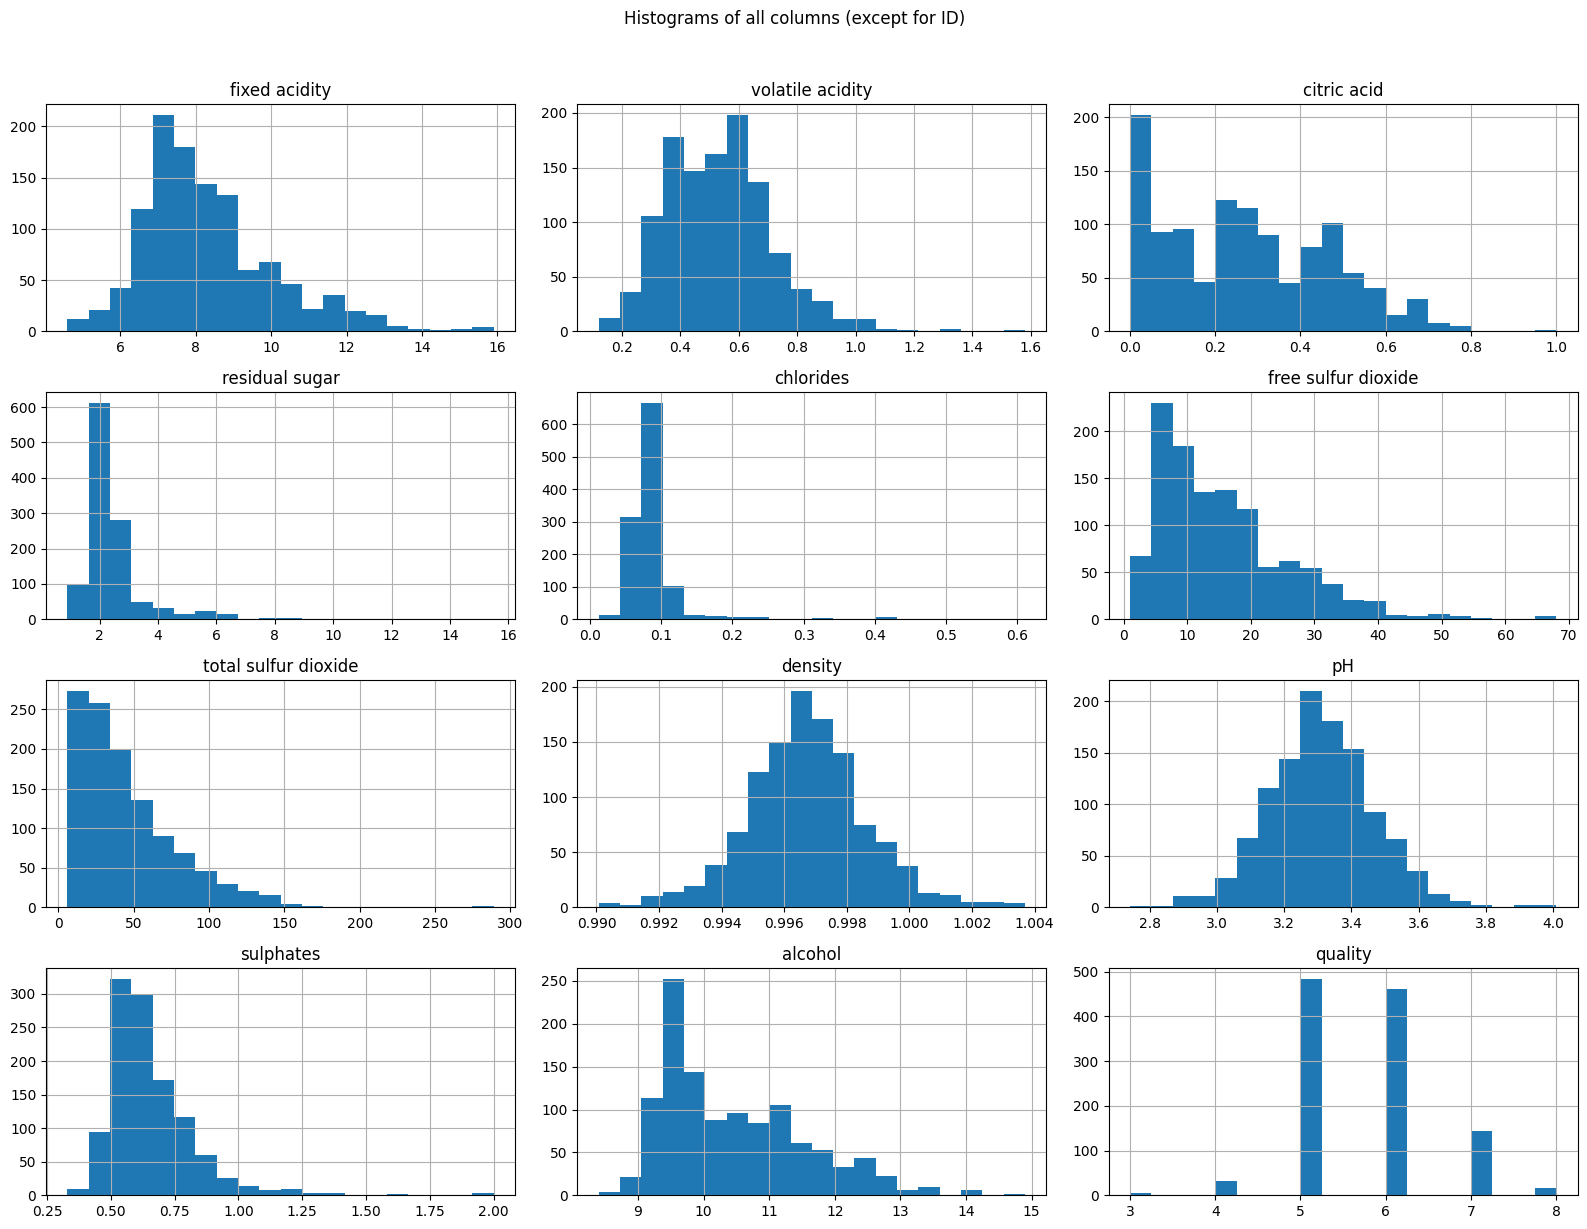

In [36]:

df.drop(columns=["Id"], inplace=True) # We don't need the ID, drop it

# Show the distributions as they come in the intact DataFrame
showDistributions(df, 'Histograms of all columns (except for ID)') 

#### Normalization
First we make a standarization of all the variables with the StandardScaler (all the DF columns are numerical anyway). 
<br>
<br>
Key observations:<br>
1. The values in the Y axis don't change. This is a normal behavior, the Y axis contains the frequencies -how many times we have each variable- and that is not affected by the StandardScaler.
2. The shape of the distributions don't change neither. Which is also normal, and explained by the same reason described above.
3. The X values have indeed changed drastically with values close to zero, and that's what the StandardScaler does precisely

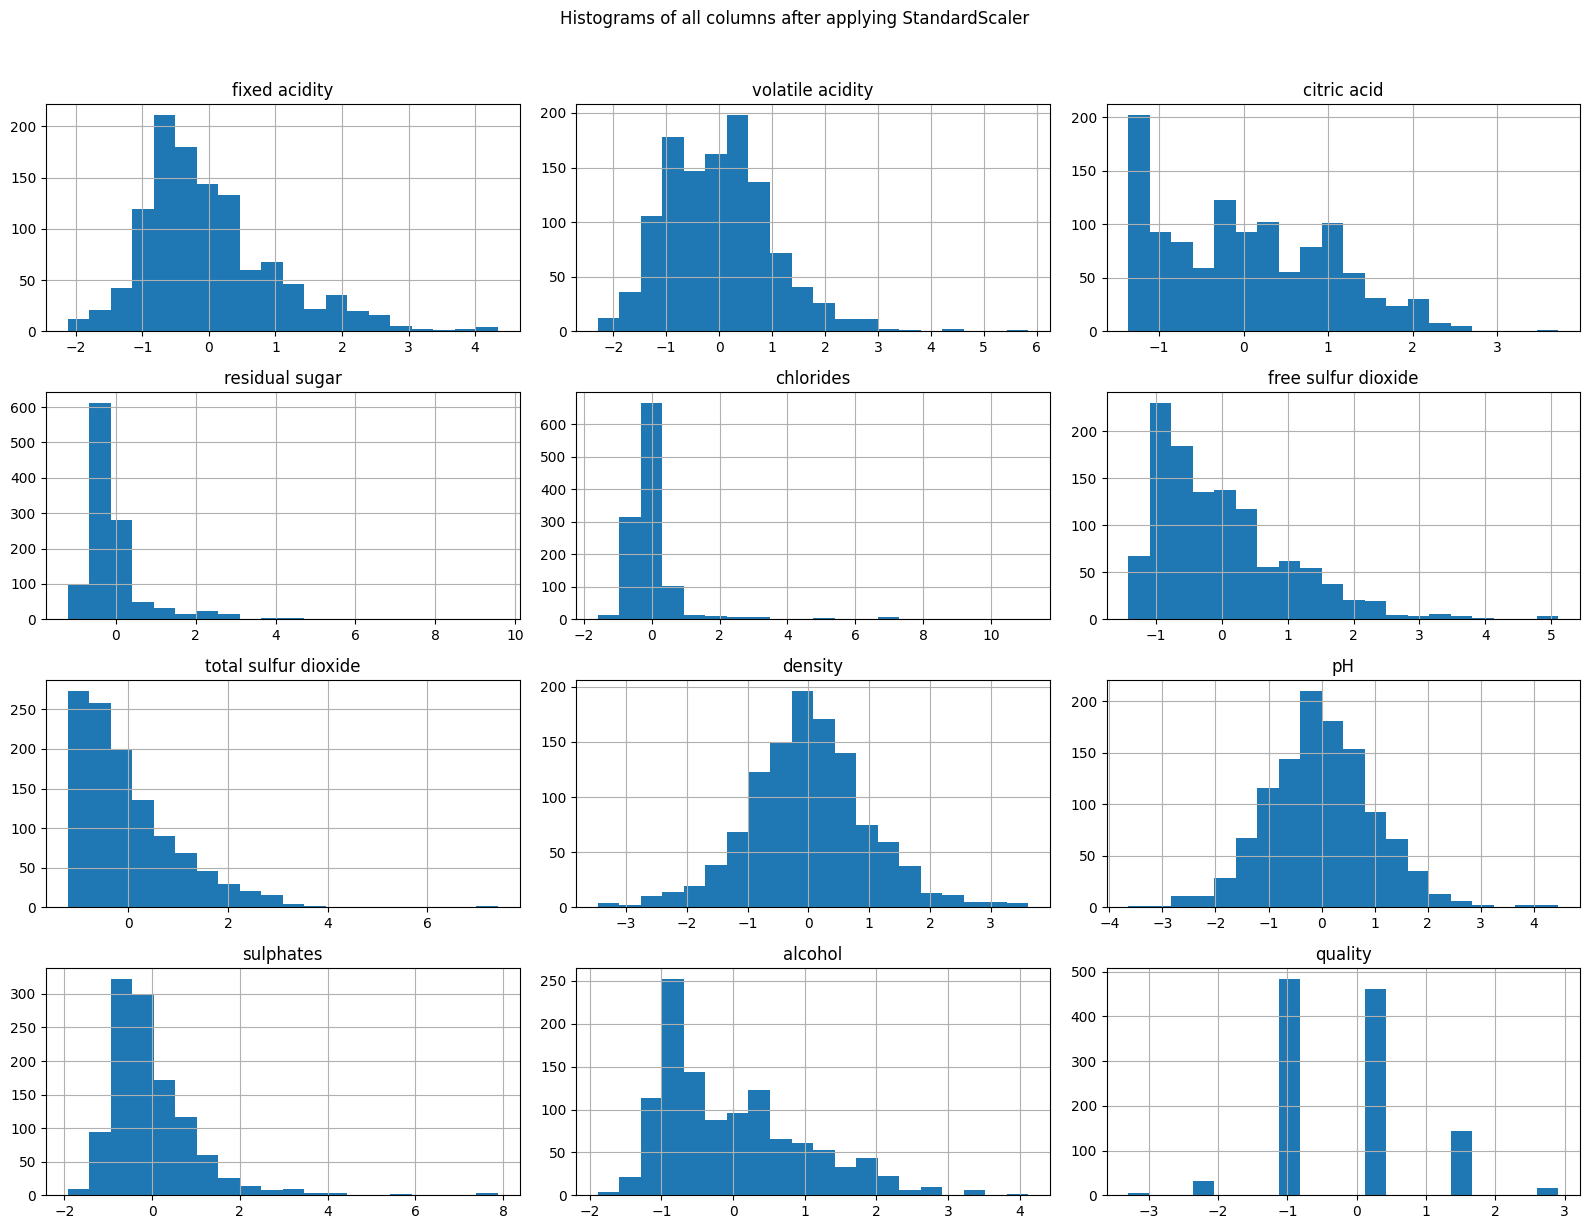

In [ ]:
from sklearn.discriminant_analysis import StandardScaler

# work with a copy of the dataframe
df_scaled = df.copy() 

stdScaler = StandardScaler()
df_scaled[df.columns] = stdScaler.fit_transform(df_scaled)

showDistributions(df_scaled, 'Histograms of all columns after normalizing with StandardScaler')

#### Discretization pd.cut (3 and 5 bins respectively)

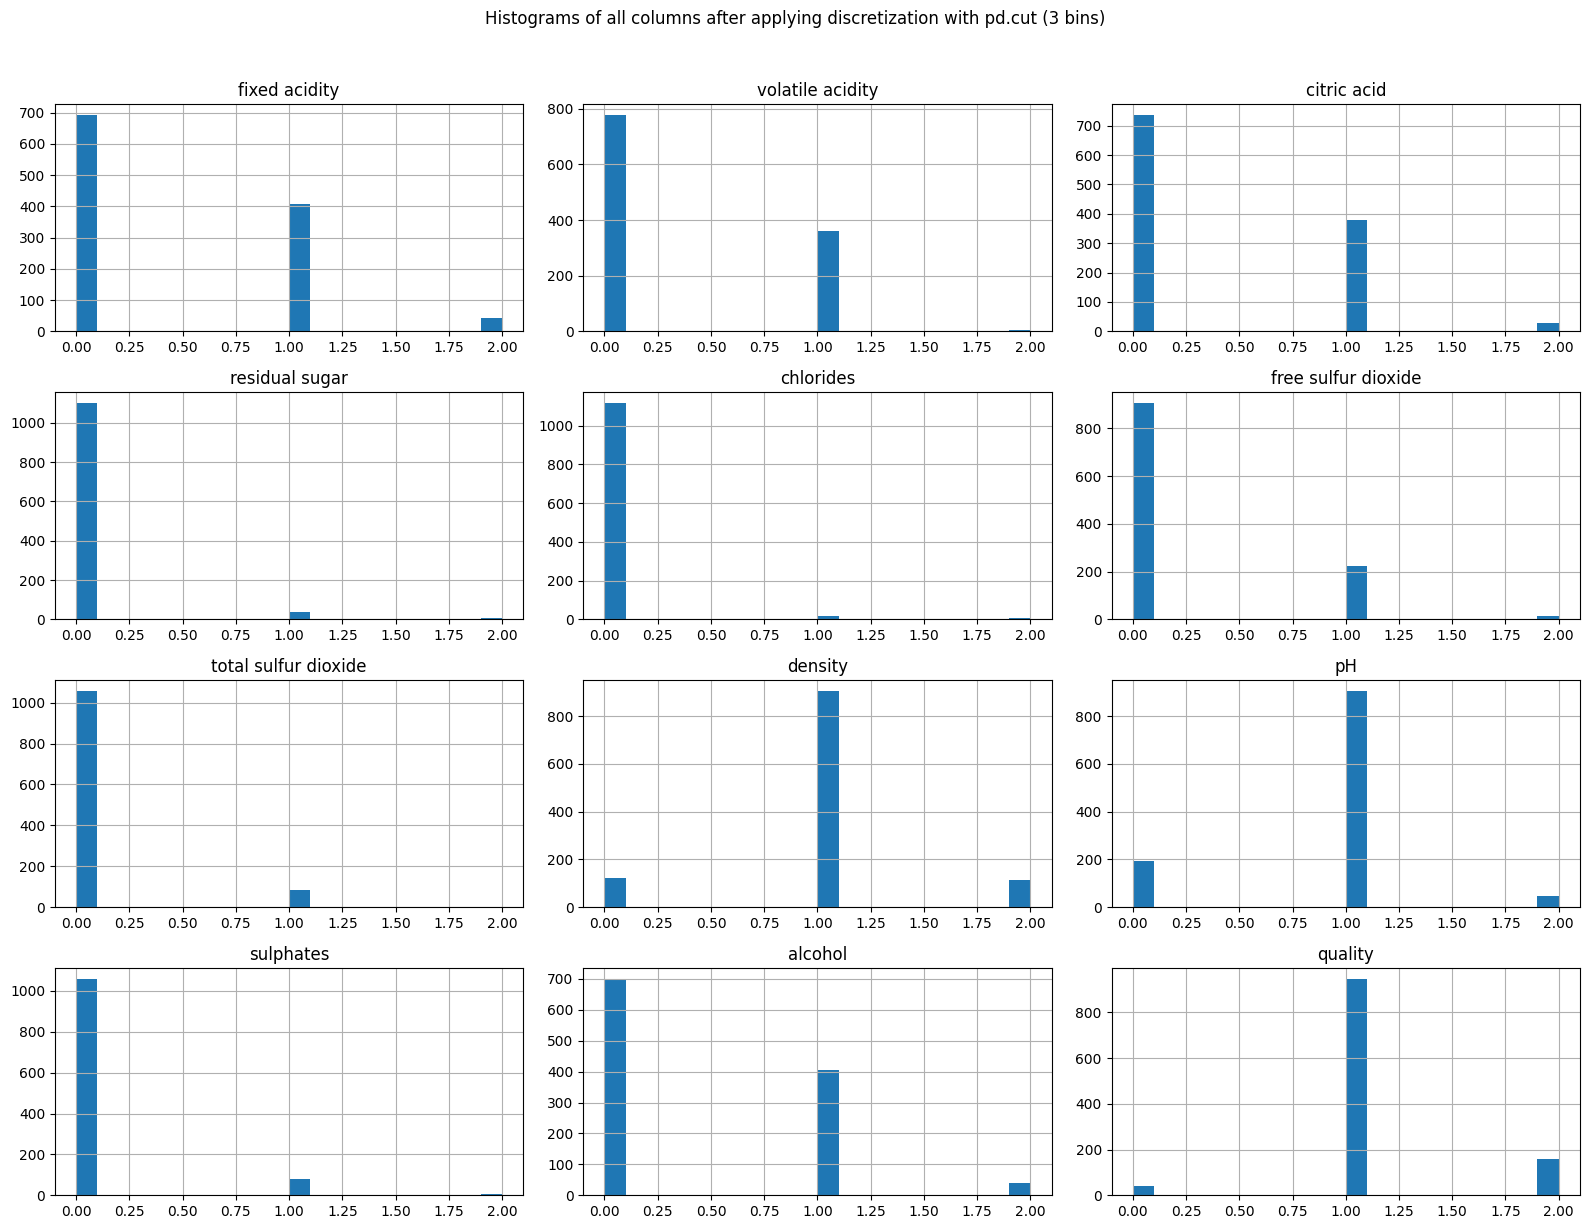

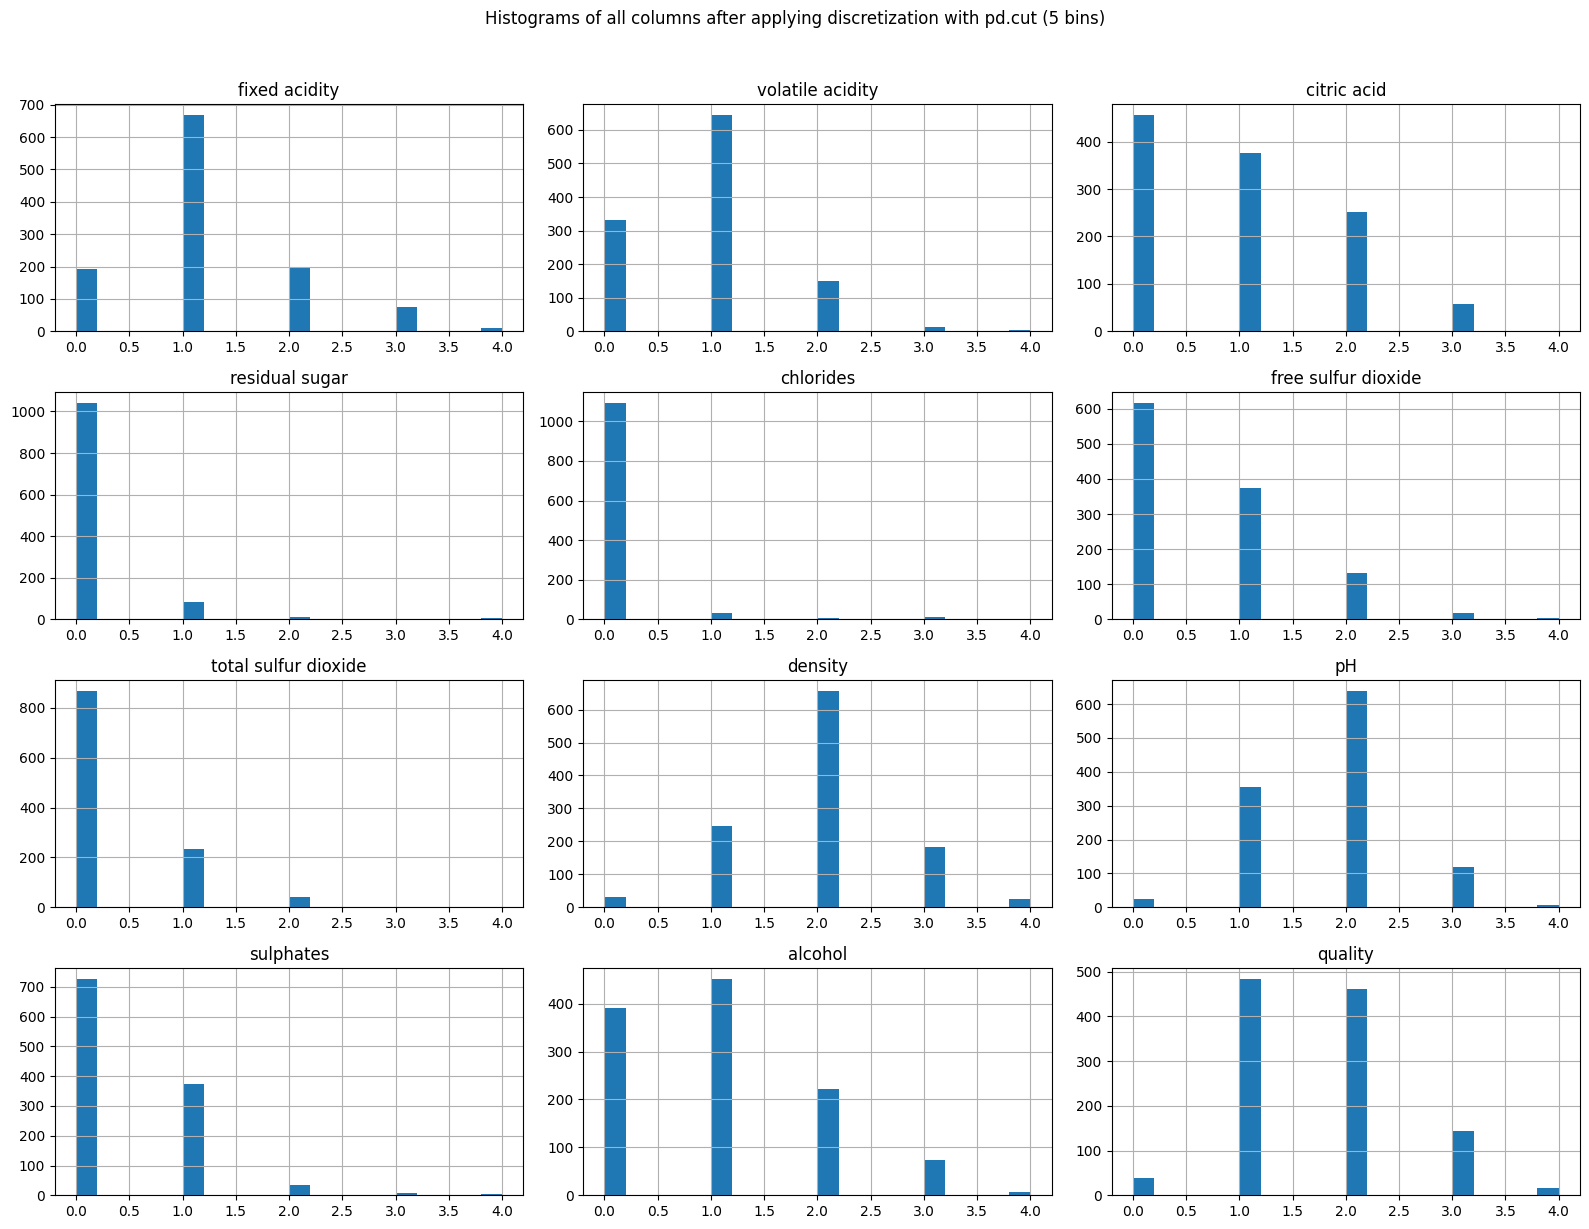

In [58]:
def discretizePD_CUT(numbins):
    # Work with a copy of the dataframe
    df_discretized_pdcut = df.copy() 

    # Generate labels dynamically based on numbins
    labels = list(range(numbins))  # Creates [0, 1, 2] for 3 bins, [0, 1, 2, 3, 4] for 5 bins, etc.

    # Discretize the data
    for column in df_discretized_pdcut.columns:
        df_discretized_pdcut[column] = pd.cut(df_discretized_pdcut[column], bins=numbins, labels=labels)

    # Convert categorical columns back to numeric for plotting
    df_discretized_numeric = df_discretized_pdcut.copy()
    for column in df_discretized_numeric.columns:
        df_discretized_numeric[column] = df_discretized_numeric[column].astype(int)

    showDistributions(df_discretized_numeric, f'Histograms of all columns after applying discretization with pd.cut ({numbins} bins)')

discretizePD_CUT(3)
discretizePD_CUT(5)

#### Discretization pd.qcut (quantiles) (3 and 5 bins respectively)

qcut makes sure there is the same frequency on every bin, this makes sense in the visualization of the distribution of each variable as seen below.

\* We can also observe that the distribution of the variables becomes uniform

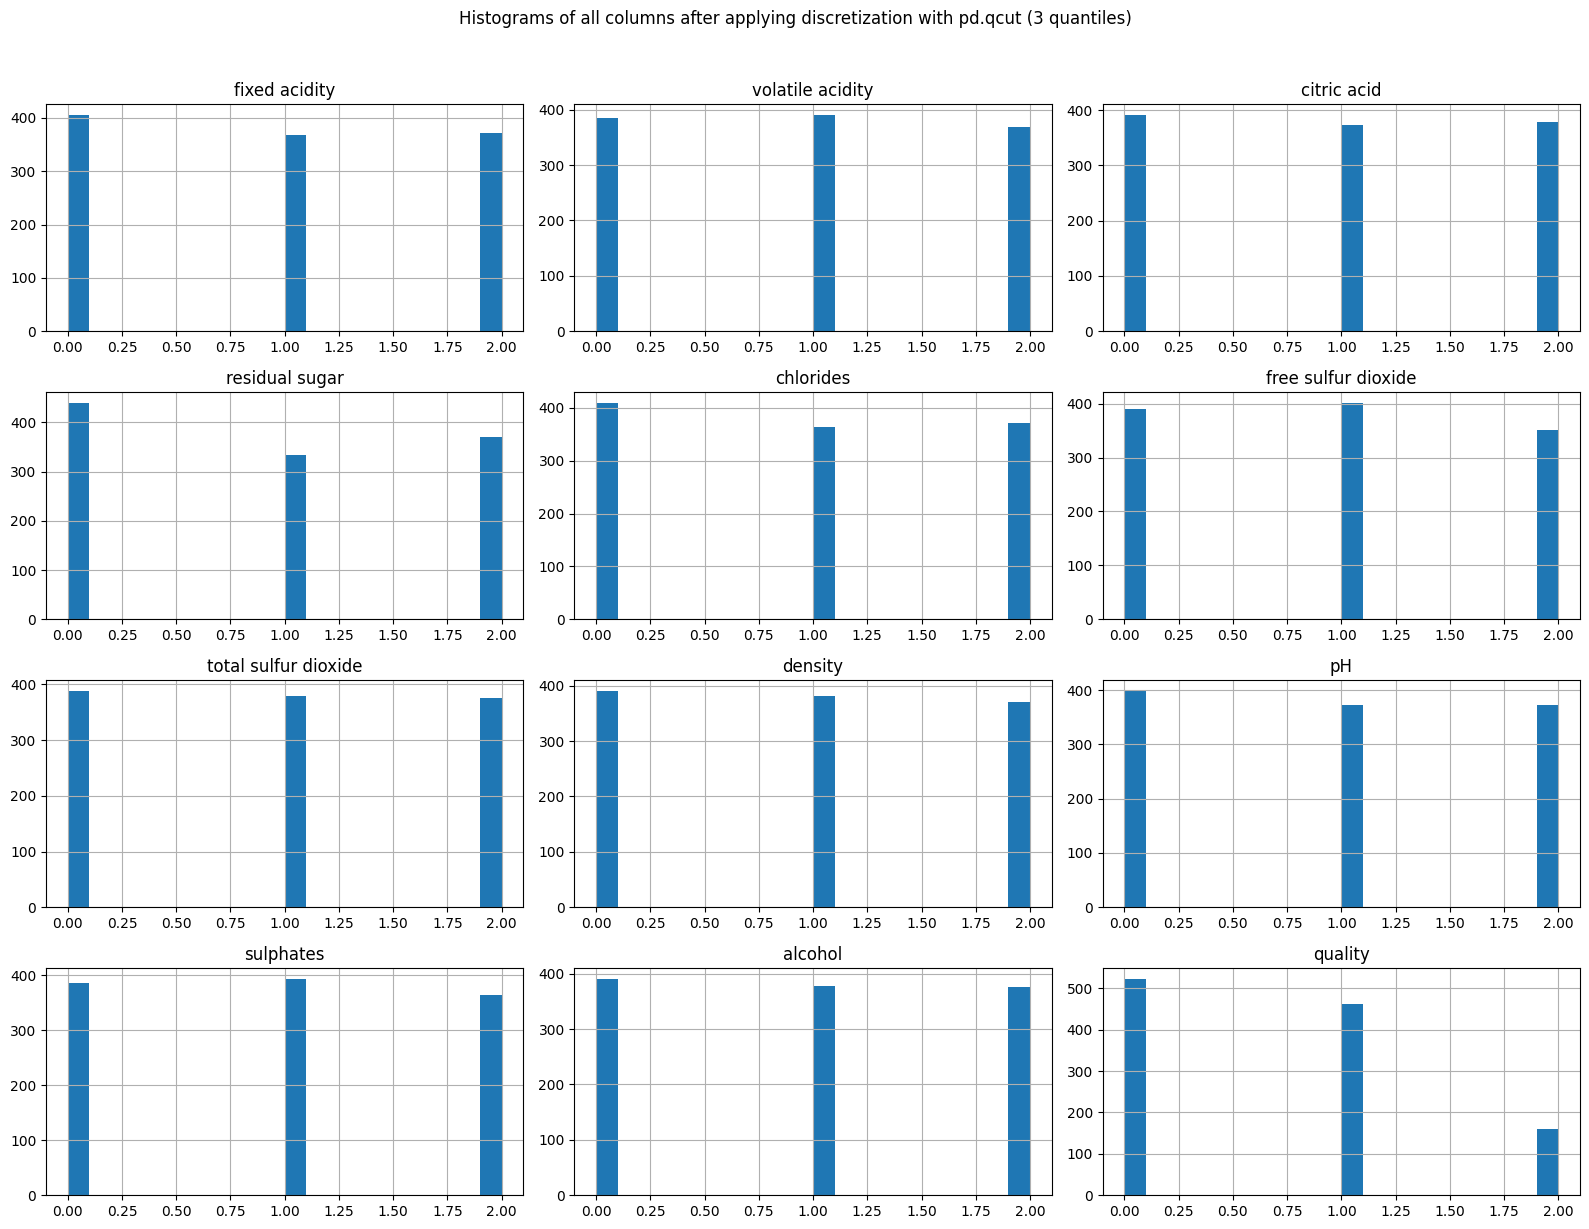

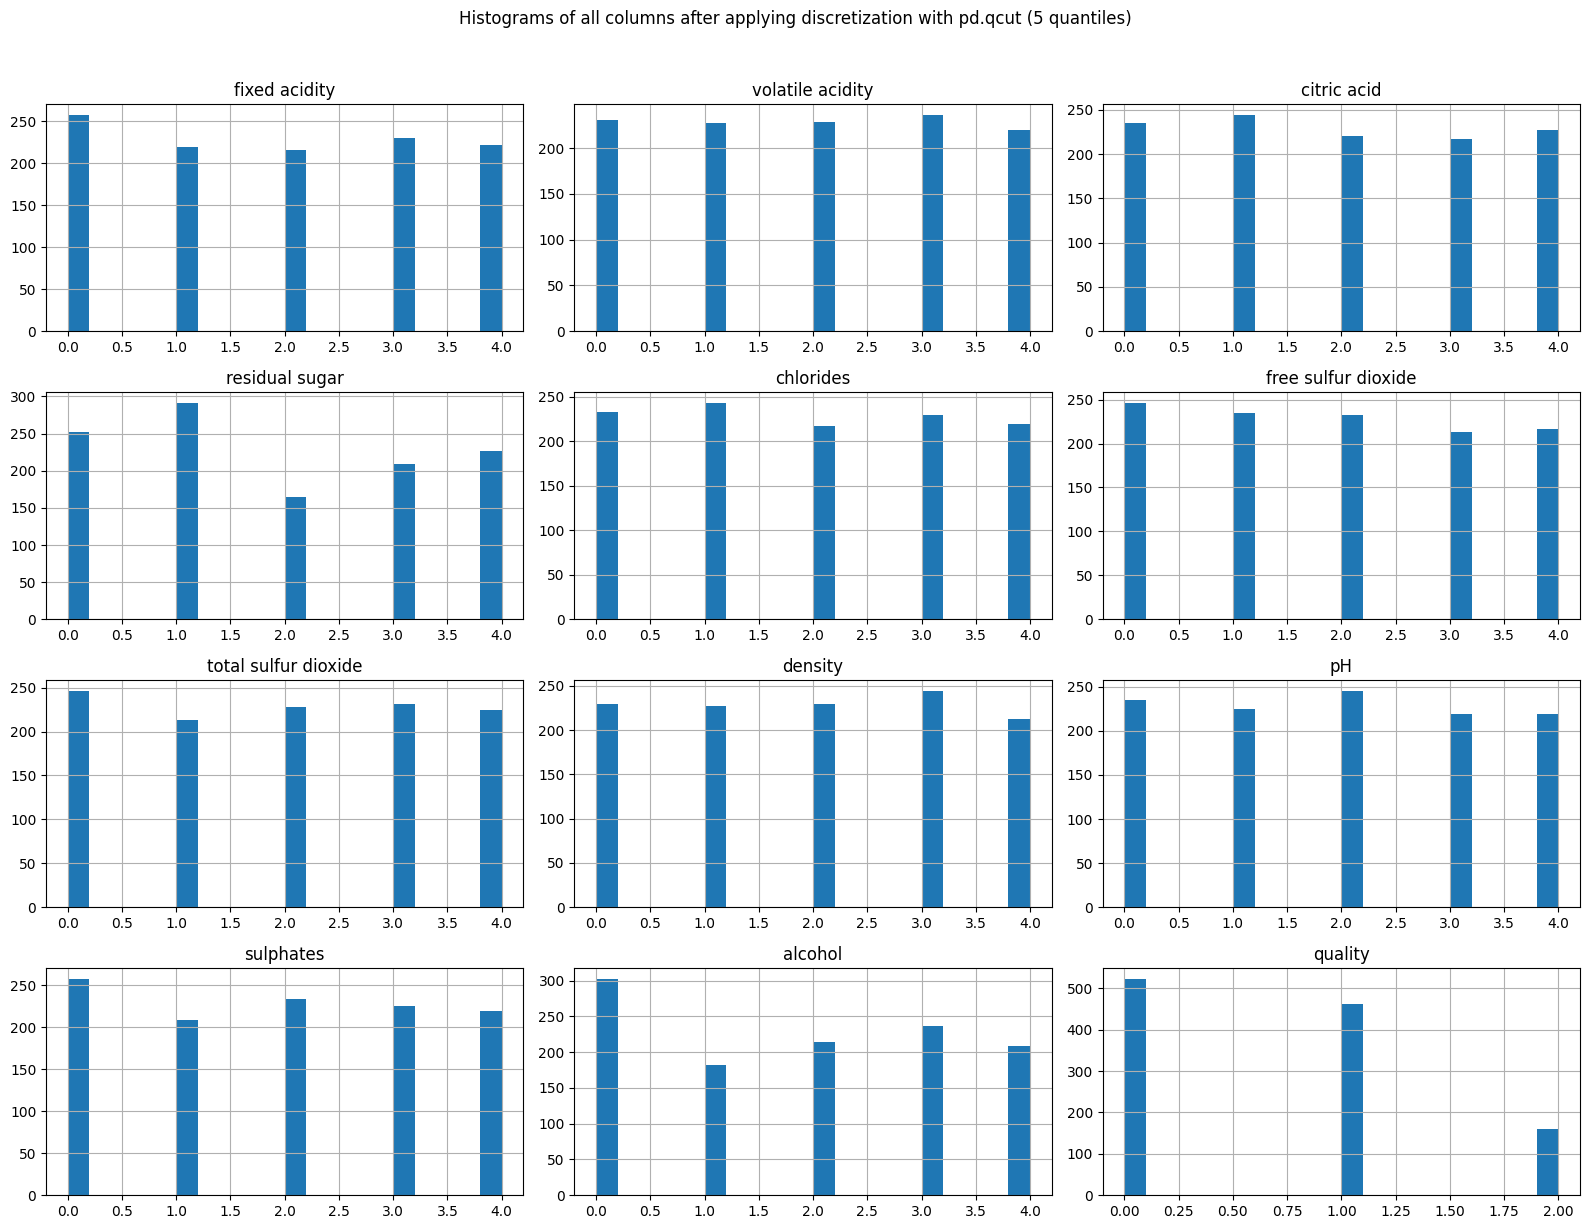

In [67]:
def discretizePD_QCUT(numbins):
    # Work with a copy of the dataframe
    df_discretized_qcut = df.copy() 

    # Discretize the data using qcut (quantile-based) without specifying labels
    for column in df_discretized_qcut.columns:
        df_discretized_qcut[column] = pd.qcut(df_discretized_qcut[column], q=numbins, duplicates='drop')

    # Convert categorical columns back to numeric for plotting using codes
    df_discretized_numeric = df_discretized_qcut.copy()
    for column in df_discretized_numeric.columns:
        df_discretized_numeric[column] = df_discretized_numeric[column].cat.codes

    showDistributions(df_discretized_numeric, f'Histograms of all columns after applying discretization with pd.qcut ({numbins} quantiles)')

discretizePD_QCUT(3)
discretizePD_QCUT(5)

#### Apply a Yeo-Jobhnson transformation

Contrary to other transofrmation methods such as Box-Cox, this method is able to deal with negative values. Also, the distribution becomes closer to a Normal distribution, which can be positive to increase the performance of several ML algorithms.

Some potentially negative effects of this transformation:
- *Impact on Outliers*: Transformations like log can reduce the effect of outliers, which is often beneficial, but in some cases, outliers carry important information (e.g., fraud detection). Suppressing them might reduce model performance.
- *Non-Linear Effects on Other Features*: If you transform one feature but not others, or if features are correlated, the transformation might disrupt the relationships between features, potentially confusing the algorithm

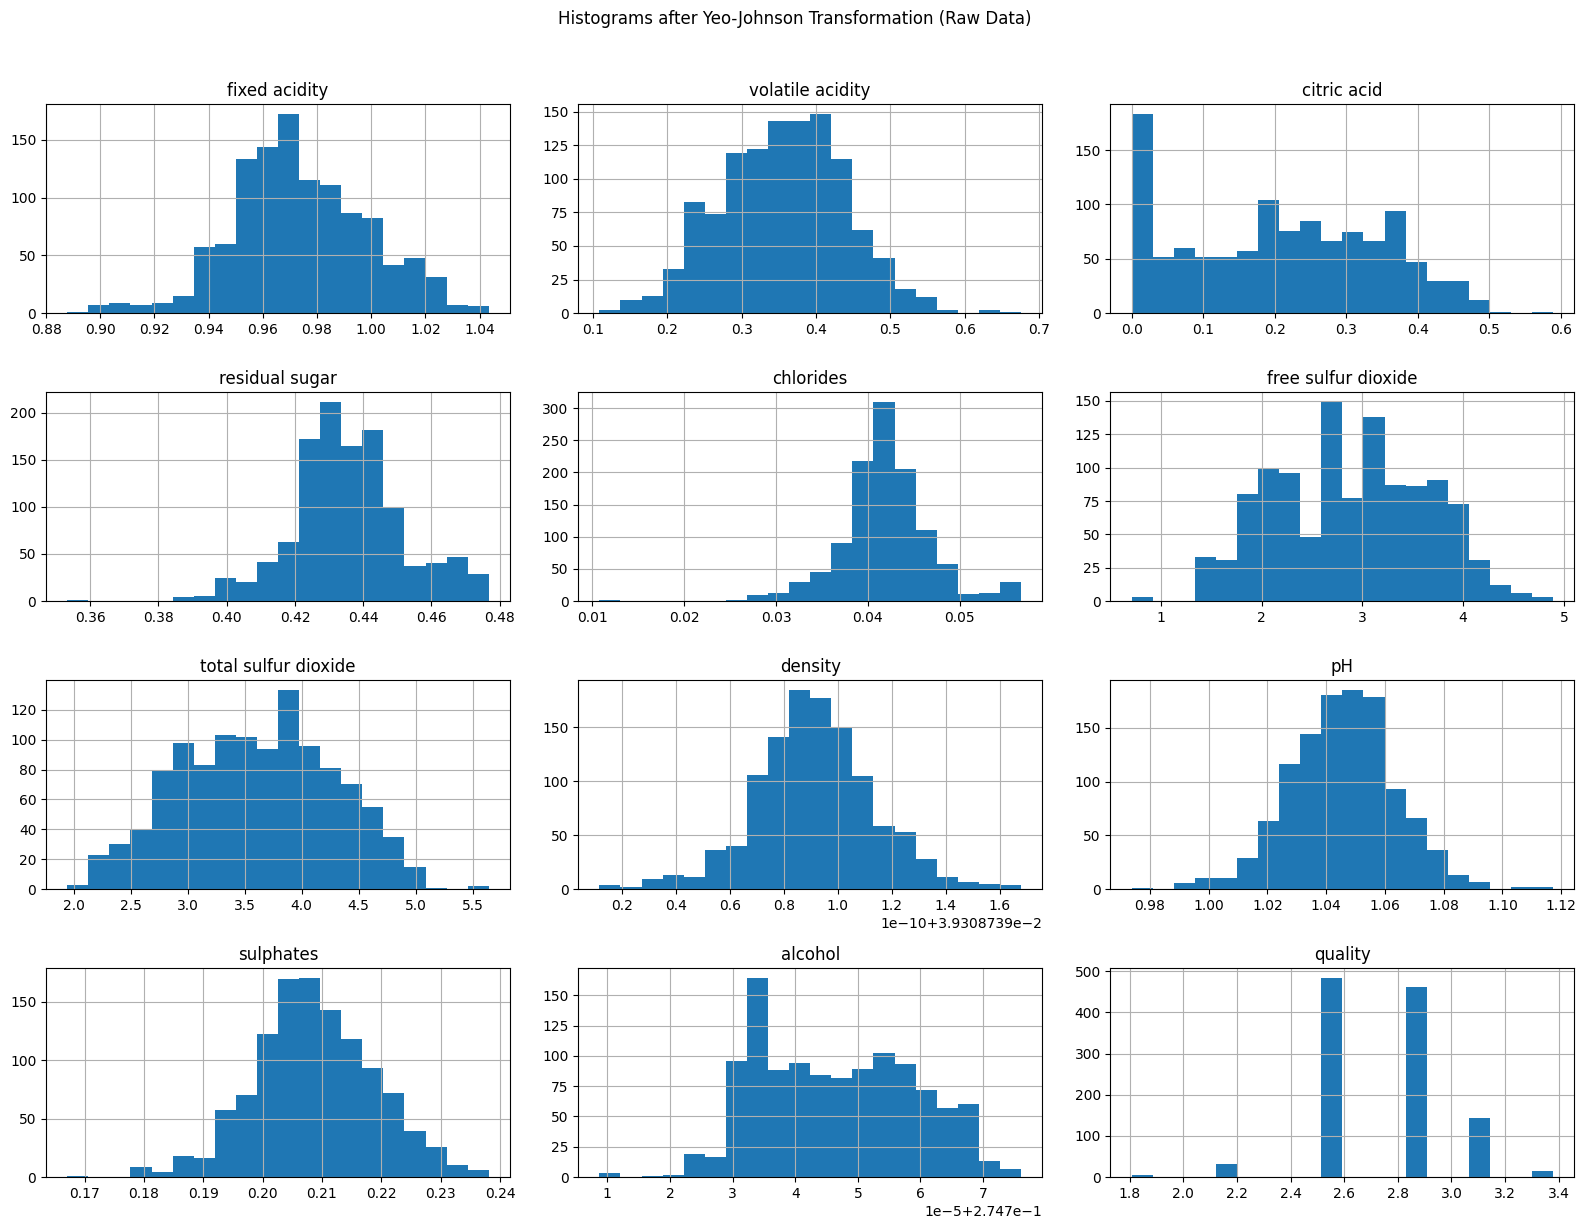

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Work with a copy of the original raw dataframe
df_yj_transformed = df.copy()

# Initialize and apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_data = pt.fit_transform(df_yj_transformed)

# Create transformed dataframe
df_yj_transformed = pd.DataFrame(transformed_data, columns=df.columns, index=df.index)

# Show distributions
showDistributions(df_yj_transformed, 'Histograms after Yeo-Johnson Transformation (Raw Data)')